In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from keras.layers import Input, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import UpSampling2D, Flatten, Activation
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras import backend as k

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
seed_val = 9000
np.random.seed(seed_val)
random.seed(seed_val)

In [0]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()

print('SIze of the training_set',X_train.shape)
print("size of test_set",X_test.shape)
print("Shape of each image",X_train[0].shape)
print("Total number of class",len(np.unique(y_train)))
print("Unique class labels: ",np.unique(y_train))

11493376/11490434 [==============================] - 0s 0us/step
SIze of the training_set (60000, 28, 28)
size of test_set (10000, 28, 28)
Shape of each image (28, 28)
Total number of class 10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


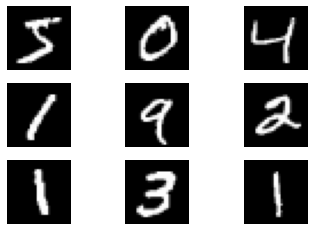

In [0]:
for i in range(0,9):
  plt.subplot(331+i)
  plt.axis("off")
  plt.imshow(X_train[i],cmap='gray')

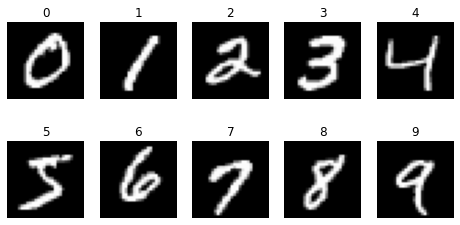

In [0]:
fig = plt.figure(figsize=(8,4))
columns  =5
rows = 2
for i in range(0,rows*columns):
  fig.add_subplot(rows,columns, i+1)
  plt.title(str(i))
  plt.axis("off")
  plt.imshow(X_train[np.where(y_train ==i)][0],cmap='gray')
plt.show()

In [0]:
print("Maximum pixel value in the training_set",np.max(X_train))
print("Minimum pixel value in the training_set",np.min(X_train))

Maximum pixel value in the training_set 255
Minimum pixel value in the training_set 0


In [0]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

X_train = (X_train - 127.5)/127.5
X_test = (X_test - 127.5)/127.5
print("Maximum pixel value in the training_set after Centering and Scaling",np.max(X_train))
print("Minimum pixel value in the training_set after Centering and Scaling",np.min(X_train))

Maximum pixel value in the training_set after Centering and Scaling 1.0
Minimum pixel value in the training_set after Centering and Scaling -1.0


In [0]:
def upscale(image):
  return (image* 127.5 + 127.5).astype(np.uint8)

z = upscale(X_train[0])
print("Maximum pixel value after upscaling scaled image",np.max(z))
print("Maximum pixel value after upscaling scaled image",np.min(z))

Maximum pixel value after upscaling scaled image 255
Maximum pixel value after upscaling scaled image 0


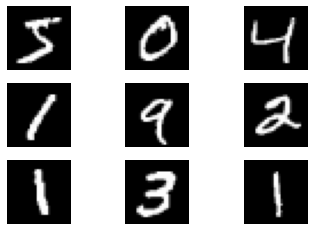

In [0]:
for i in range(0,9):
  plt.subplot(331+i)
  plt.axis("off")
  plt.imshow(upscale(X_train[i]),cmap = 'gray')

In [0]:
def noising(image):
  array = np.array(image)
  i = random.choice(range(8,12))
  j = random.choice(range(8,12))
  array[i:i+8, j:j+8]=-1.0
  return array
noised_train_data = np.array([*map(noising,X_train)])
noised_test_data = np.array([*map(noising,X_test)])
print('Noised train data Shape/Dimension',noised_train_data.shape)
print('Noised test data Shape/Dimension',noised_test_data.shape)

Noised train data Shape/Dimension (60000, 28, 28)
Noised test data Shape/Dimension (10000, 28, 28)


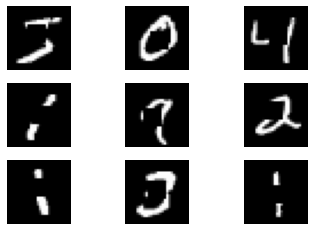

In [0]:
for i in range(0,9):
  plt.subplot(331+i)
  plt.axis("off")
  plt.imshow(upscale(noised_train_data[i]), cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print('Size/Shape of the original training set : ',X_train.shape)

noised_train_data = noised_train_data.reshape(noised_train_data.shape[0],
                                              noised_train_data.shape[1],
                                              noised_train_data.shape[2],1)
print('Size/Shape of the original training set : ',noised_train_data.shape)


X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print('Size/Shape of the original test set :',X_test.shape)

noised_test_data = noised_test_data.reshape(noised_test_data.shape[0],
                                            noised_test_data.shape[1],
                                            noised_test_data.shape[2],1)
print('Size/Shape of the original test set :',X_test.shape)

Size/Shape of the original training set :  (60000, 28, 28, 1)
Size/Shape of the original training set :  (60000, 28, 28, 1)
Size/Shape of the original test set : (10000, 28, 28, 1)
Size/Shape of the original test set : (10000, 28, 28, 1)


In [0]:
from keras import backend as k
k.clear_session()

In [0]:
input_shape = (28,28,1)

def train_mnist(input_shape,X_train,y_train):
  model = Sequential()
  model.add(Conv2D(32,(3,3),strides=2,padding='same',input_shape = input_shape))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,(3,3),strides = 2,padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),strides=2,padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())

  model.add(Dense(1024,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer = 'adam',metrics=['accuracy'])
  model.fit(X_train,y_train,batch_size=128,
            epochs = 3, validation_split = 0.2,verbose = 1)
  return model

mnist_model = train_mnist(input_shape,X_train,y_train)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 49s 1ms/step - loss: 0.2950 - accuracy: 0.9077 - val_loss: 0.0840 - val_accuracy: 0.9746
Epoch 2/3
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0906 - accuracy: 0.9719 - val_loss: 0.0635 - val_accuracy: 0.9811
Epoch 3/3
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0531 - val_accuracy: 0.9839


In [0]:
pred_labels = mnist_model.predict_classes(noised_test_data)
print('The model accuracy on the masked images is : ',np.mean(pred_labels == y_test)*100)

The model accuracy on the masked images is :  74.79


In [0]:
smooth_real = 0.9
epochs = 5
batch_size = 128
optimizer_g = Adam(lr=0.0002,beta_1=0.5)
optimizer_d = Adam(lr=0.0004,beta_1=0.5)
input_shape = (28,28,1)

In [0]:
def img_generator(input_shape):
  generator = Sequential()
  generator.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape))
  generator.add(BatchNormalization())
  generator.add(Activation('relu'))
  generator.add(AveragePooling2D(pool_size=(2,2)))

  generator.add(Conv2D(64,(3,3),padding= 'same'))
  generator.add(BatchNormalization())
  generator.add(Activation('relu'))
  generator.add(AveragePooling2D(pool_size=(2,2)))

  generator.add(Conv2D(128,(3,3),padding='same'))
  generator.add(BatchNormalization())
  generator.add(Activation('relu'))

  generator.add(Conv2D(128,(3,3),padding='same'))
  generator.add(Activation('relu'))
  generator.add(UpSampling2D((2,2)))
  
  generator.add(Conv2D(64,(3,3),padding='same'))
  generator.add(Activation('relu'))
  generator.add(UpSampling2D((2,2)))

  generator.add(Conv2D(1,(3,3),activation='tanh',padding='same'))
  return generator

In [0]:
img_generator(input_shape).summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)       

In [0]:
def img_discriminator(input_shape):
  discriminator = Sequential()
  discriminator.add(Conv2D(64,(3,3),strides=2,padding='same',input_shape=input_shape,activation='linear'))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.2))

  discriminator.add(Conv2D(128,(3,3),strides=2, padding='same',activation='linear'))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.2))

  discriminator.add(Conv2D(256,(3,3),padding='same',activation='linear'))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.2))

  discriminator.add(Flatten())
  discriminator.add(Dense(1, activation='sigmoid'))

  return discriminator

img_discriminator(input_shape).summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 256)        

In [0]:
def dcgan(discriminator, generator, input_shape):
  discriminator.trainable = False
  gan_input = Input(shape = input_shape)
  gen_img = generator(gan_input)
  gan_output = discriminator(gen_img)

  gan = Model(inputs = gan_input, outputs = gan_output)
  return gan

In [0]:
def generated_images_plot(original, noised_data, generator):
    
    print('NOISED')
    for i in range(9):
        plt.subplot(331 + i)
        plt.axis('off')
        plt.imshow(upscale(np.squeeze(noised_data[i])), cmap='gray') # upscale for plotting
    plt.show()
    
    print('GENERATED')
    for i in range(9):
        pred = generator.predict(noised_data[i:i+1], verbose=0)
        plt.subplot(331 + i)
        plt.axis('off')
        plt.imshow(upscale(np.squeeze(pred[0])), cmap='gray') # upscale to avoid plotting errors
    plt.show()
    
    print('ORIGINAL')
    for i in range(9):
        plt.subplot(331 + i)
        plt.axis('off')
        plt.imshow(upscale(np.squeeze(original[i])), cmap='gray') # upscale for plotting
    plt.show()

In [0]:
def plot_generated_images_combined(original,noised_data, generator):
  rows, cols = 4,12
  num = rows * cols
  image_size = 28
  generated_images = generator.predict(noised_data[0:num])
  imgs = np.concatenate([original[0:num],noised_data[0:num],generated_images])
  imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
  imgs = np.vstack(np.split(imgs, rows, axis=1))
  imgs = imgs.reshape((rows *3 , -1,image_size, image_size))
  imgs = np.vstack([np.hstack(i) for i in imgs])
  imgs = upscale(imgs)
  plt.figure(figsize=(8,16))
  plt.axis("off")
  plt.title('Original Images : top rows,'
            'Corrupted Input: middle rows'
            'Generated Images : bottom rows')
  plt.imshow(imgs,cmap='gray')
  plt.show()

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch 1
Iteration - %d 1
NOISED


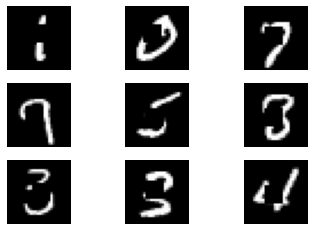

GENERATED


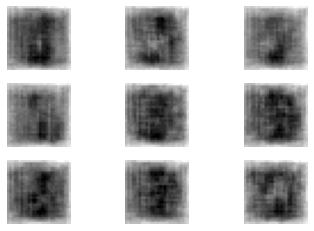

ORIGINAL


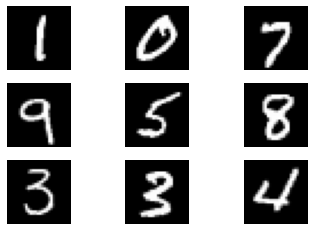

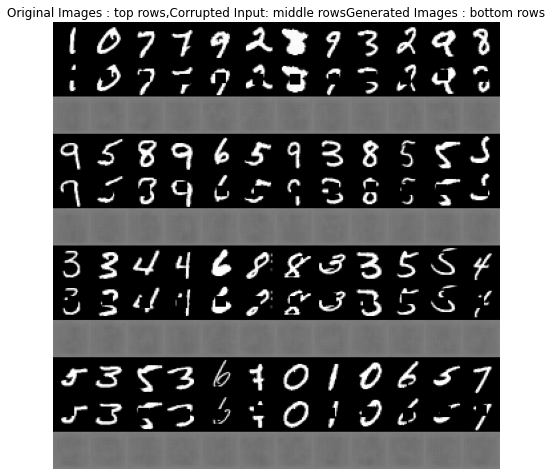

100%|██████████| 468/468 [17:57<00:00,  2.30s/it]


Discriminator Loss:  0.16450989 , Adversarial Loss:  7.7297654
NOISED


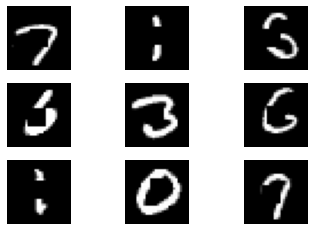

GENERATED


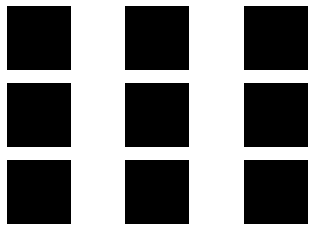

ORIGINAL


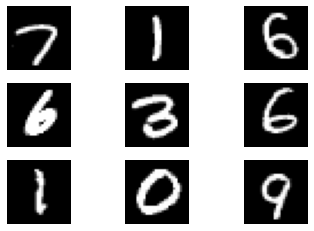

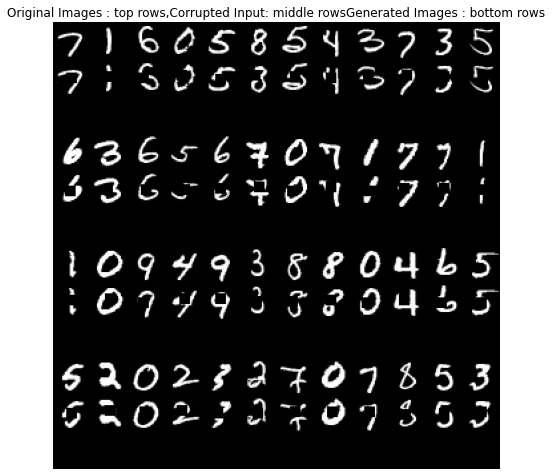

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch 2


100%|██████████| 468/468 [17:46<00:00,  2.28s/it]


Discriminator Loss:  0.16300702 , Adversarial Loss:  9.340452
NOISED


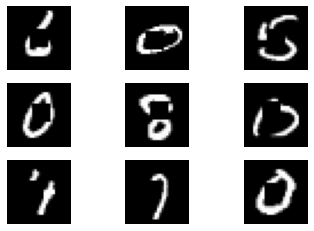

GENERATED


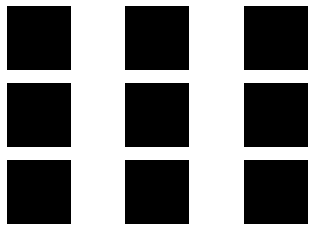

ORIGINAL


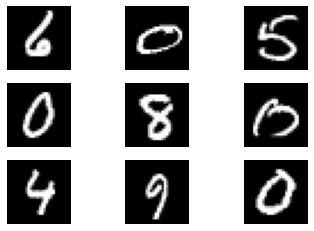

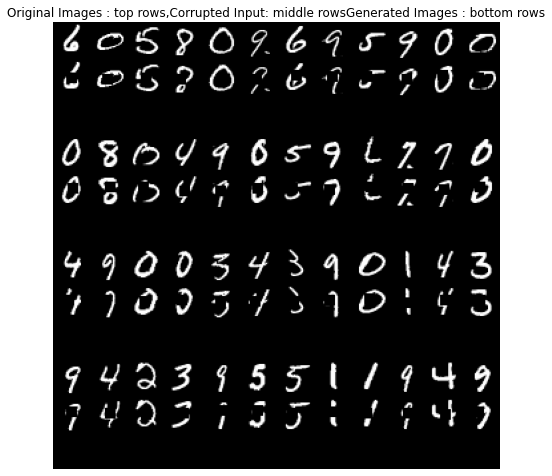

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch 3


100%|██████████| 468/468 [17:48<00:00,  2.28s/it]


Discriminator Loss:  0.1628962 , Adversarial Loss:  10.094336
NOISED


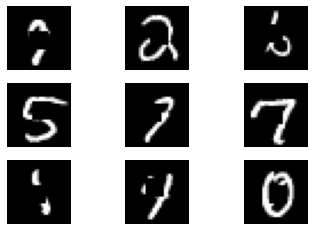

GENERATED


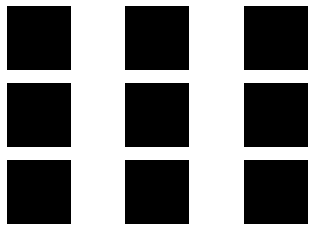

ORIGINAL


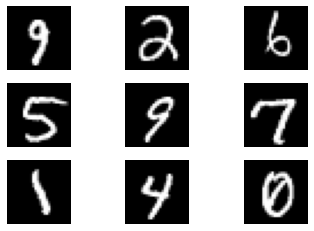

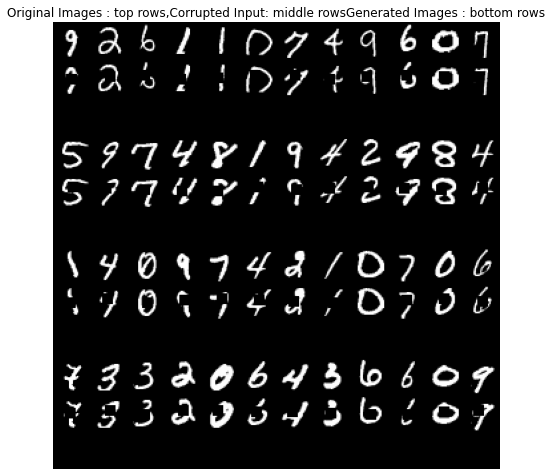

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch 4


100%|██████████| 468/468 [17:47<00:00,  2.28s/it]


Discriminator Loss:  0.1627613 , Adversarial Loss:  9.8345375
NOISED


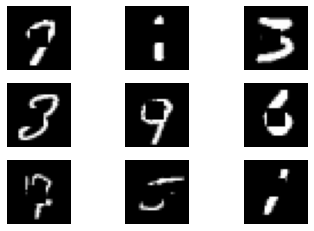

GENERATED


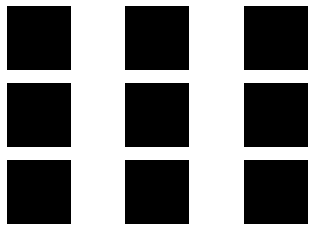

ORIGINAL


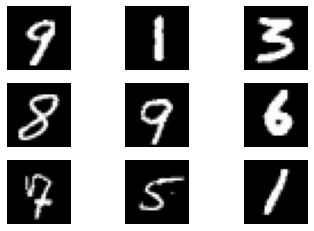

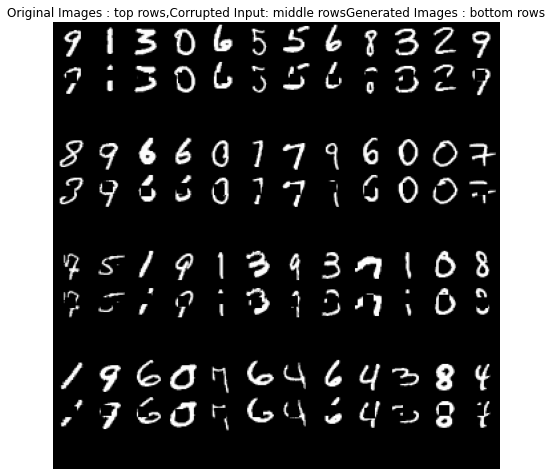

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch 5


100%|██████████| 468/468 [17:57<00:00,  2.30s/it]


Discriminator Loss:  0.16278511 , Adversarial Loss:  9.486666
NOISED


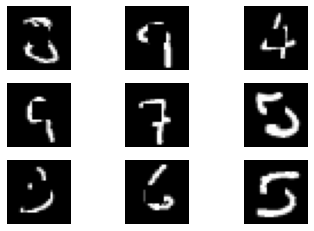

GENERATED


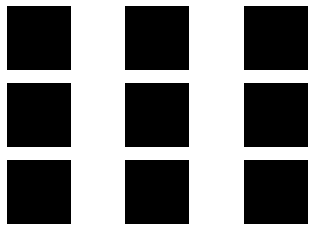

ORIGINAL


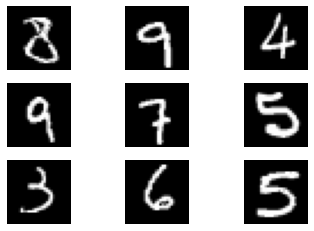

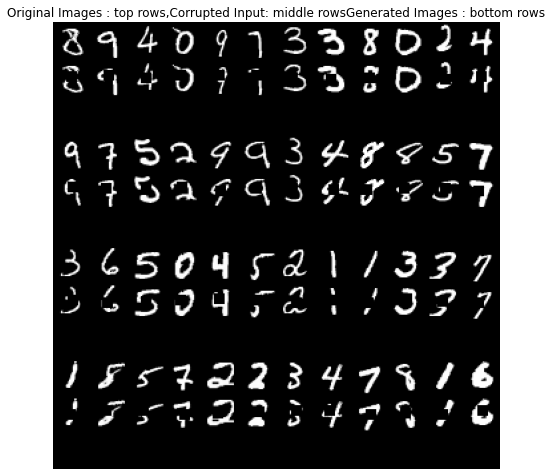

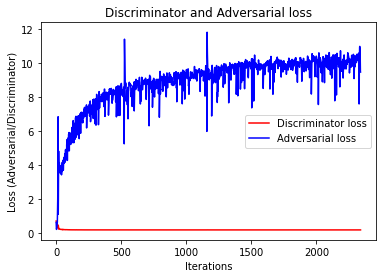

In [0]:
def train(X_train, noised_train_data,
          input_shape, smooth_real,
          epochs, batch_size,
          optimizer_g, optimizer_d):

    # define two empty lists to store the discriminator
    # and the generatoe losses
    discriminator_losses = []
    generator_losses = []
    
    # Number of iteration possible with batches of size 128
    iterations = X_train.shape[0] // batch_size

    # Load the generator and the discriminator
    generator = img_generator(input_shape)
    discriminator = img_discriminator(input_shape)
    
    # Compile the discriminator with binary_crossentropy loss
    discriminator.compile(loss='binary_crossentropy',optimizer=optimizer_d)
    
    # Feed the generator and the discriminator to the function dcgan
    # to form the DCGAN architecture
    gan = dcgan(discriminator, generator, input_shape)
    
    # Compile the DCGAN with binary_crossentropy loss
    gan.compile(loss='binary_crossentropy', optimizer=optimizer_g)

    for i in range(epochs):
        print ('Epoch %d' % (i+1))
        # Use tqdm to get an estimate of time remaining
        for j in tqdm(range(1, iterations+1)):
            
            # batch of original images (batch = batchsize)
            original = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            
            # batch of noised images (batch = batchsize)
            noise = noised_train_data[np.random.randint(0, noised_train_data.shape[0], size=batch_size)]

            # Generate fake images
            generated_images = generator.predict(noise)
            
            # Labels for generated data
            dis_lab = np.zeros(2*batch_size)
            
            # data for discriminator
            dis_train = np.concatenate([original, generated_images])
            
            # label smoothing for original images
            dis_lab[:batch_size] = smooth_real
            
            # Train discriminator on original iamges
            discriminator.trainable = True
            discriminator_loss = discriminator.train_on_batch(dis_train, dis_lab)
            
            # save the losses 
            discriminator_losses.append(discriminator_loss)
            
            # Train generator
            gen_lab = np.ones(batch_size)
            discriminator.trainable = False
            sample_indices = np.random.randint(0, X_train.shape[0], size=batch_size)
            original = X_train[sample_indices]
            noise = noised_train_data[sample_indices]
            
            generator_loss = gan.train_on_batch(noise, gen_lab)
            
            # save the losses
            generator_losses.append(generator_loss)
            
            if i == 0 and j == 1:
                print('Iteration - %d', j)
                generated_images_plot(original, noise, generator)
                plot_generated_images_combined(original, noise, generator)
        
        print("Discriminator Loss: ", discriminator_loss,\
              ", Adversarial Loss: ", generator_loss)
        
        # training plot 1
        generated_images_plot(original, noise, generator)
        # training plot 2
        plot_generated_images_combined(original, noise, generator)
    
    
    # plot the training losses
    plt.figure()
    plt.plot(range(len(discriminator_losses)), discriminator_losses,
             color='red', label='Discriminator loss')
    plt.plot(range(len(generator_losses)), generator_losses,
             color='blue', label='Adversarial loss')
    plt.title('Discriminator and Adversarial loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss (Adversarial/Discriminator)')
    plt.legend()
    plt.show()
    
    return generator

generator = train(X_train, noised_train_data,
                  input_shape, smooth_real,
                  epochs, batch_size,
                  optimizer_g, optimizer_d)

In [0]:
gen_imgs_test = generator.predict(noised_test_data)

In [0]:
gen_pred_lab = mnist_model.predict_classes(gen_imgs_test)
print('The model accuracy on the generated images is : ',np.mean(gen_pred_lab==y_test)*100)

The model accuracy on the generated images is :  11.35


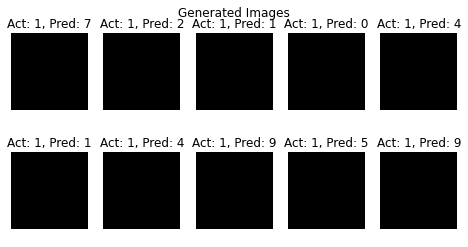

In [0]:
fig=plt.figure(figsize=(8, 4))
plt.title('Generated Images')
plt.axis('off') 
columns = 5
rows = 2
for i in range(0, rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.title('Act: %d, Pred: %d'%(gen_pred_lab[i],y_test[i])) # label 
    plt.axis('off') # turn off axis
    plt.imshow(upscale(np.squeeze(gen_imgs_test[i])), cmap='gray') # gray scale
plt.show()